In [1]:
#  add karna-python-backend to the path
import sys
sys.path.append('C:/Users/Prince/Documents/GitHub/Proejct-Karna/offline-ai-assistant/karna-python-backend')

from importlib import reload  # Not needed in Python 2
import logging
reload(logging)
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.INFO, datefmt='%I:%M:%S')

logger = logging.getLogger(__name__)

import os
import json
from typing import List
from datetime import datetime
from config.paths import workspace_data_dir, workspace_dir
from omni_helper import get_omniparser_inference_data, OmniParserResultModel, OmniParserResultModelList
from services.screen_capture_service import ScreenshotEvent

10:57:30 INFO:NumExpr defaulting to 12 threads.


Testing PatchMatcher for cross-theme UI element matching...
Loaded patch image: c:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\karna-python-backend\inference\omniparser\38_Up or down.png

Processing theme file: chatgpt_light_theme_test.png...


c:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\venv\lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
c:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\venv\lib\site-packages\timm\models\layers\__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
Florence2LanguageForConditionalGeneration has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel

Omniparser initialized!!!
image size: (816, 798)

0: 1280x1280 18 icons, 121.0ms
Speed: 16.8ms preprocess, 121.0ms inference, 50.3ms postprocess per image at shape (1, 3, 1280, 1280)
len(filtered_boxes): 39 29
time to get parsed content:

c:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\venv\lib\site-packages\transformers\generation\configuration_utils.py:649: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
10:58:18 INFO:Getting omniparser result model for event_id: -1
10:58:18 INFO:Converting parsed content df to bounding boxes for event_id: -1
10:58:18 INFO:Pre-processed parsed content results for event_id: -1
10:58:18 INFO:Creating omniparser result model for event_id: -1
10:58:18 INFO:Created omniparser result model for event_id: -1


 0.20147371292114258
OmniParser processing completed in 10.33 seconds
Found 39 UI elements

Processing theme file: chatgpt_dark_theme_test.png...


c:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\venv\lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Omniparser initialized!!!
image size: (826, 774)

0: 1216x1280 16 icons, 122.3ms
Speed: 23.0ms preprocess, 122.3ms inference, 0.0ms postprocess per image at shape (1, 3, 1216, 1280)


c:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\venv\lib\site-packages\transformers\generation\configuration_utils.py:649: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
10:58:27 INFO:Getting omniparser result model for event_id: -1


len(filtered_boxes): 38 29
time to get parsed content: 0.15258002281188965


10:58:27 INFO:Converting parsed content df to bounding boxes for event_id: -1
10:58:27 INFO:Pre-processed parsed content results for event_id: -1
10:58:27 INFO:Creating omniparser result model for event_id: -1
10:58:27 INFO:Created omniparser result model for event_id: -1


OmniParser processing completed in 8.84 seconds
Found 38 UI elements

Patch details - 38_Up or down.png:
Image size: (39, 39)

Matching patch against chatgpt_light_theme_test.png...
Matching completed in 0.52 seconds
Match found in chatgpt_light_theme_test.png!
Matched element ID: 30
Similarity score: 0.8547
Classification: identical
Matched content: Up

Matching patch against chatgpt_dark_theme_test.png...
Matching completed in 0.53 seconds
Match found in chatgpt_dark_theme_test.png!
Matched element ID: 30
Similarity score: 0.9643
Classification: identical
Matched content: the share function.

Test visualization saved to patch_matching_themes_test.png

=== Cross-Theme Comparison ===
Successfully found matches in 2 theme variations
Matched elements have different content:
  chatgpt_light_theme_test.png: 'Up'
  chatgpt_dark_theme_test.png: 'the share function.'
Similarity scores: ['0.8547', '0.9643']
Average similarity: 0.9095
Score difference: 0.1096

Tests completed in 21.24 seconds.


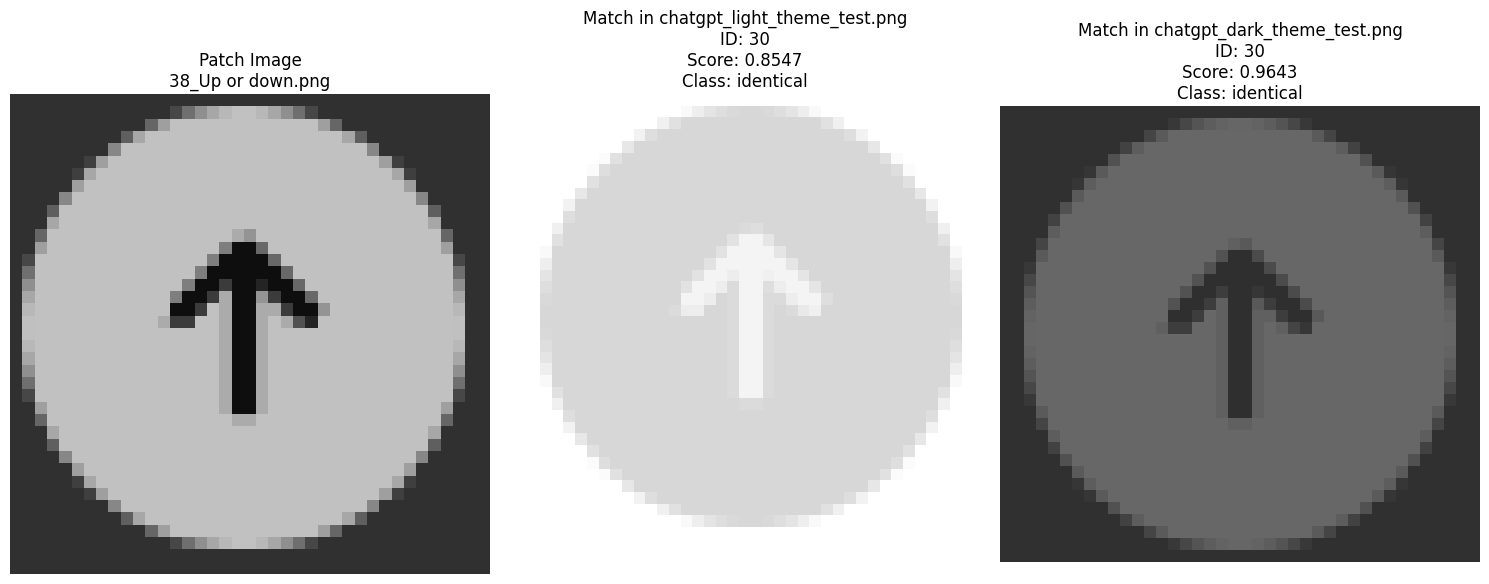

In [2]:
from patch_matcher_test import main as test_patch_matching_across_themes
test_patch_matching_across_themes()

In [2]:
def run_omniparser_inference(json_file_path: str):
    logger.info(f"Loading screenshot events from JSON file: {json_file_path}")
        
    if not os.path.exists(json_file_path):
        raise FileNotFoundError(f"JSON file not found: {json_file_path}")
    
    try:
        with open(json_file_path, 'r', encoding='utf-8') as f:
            events_data = json.load(f)
    except json.JSONDecodeError as e:
        raise ValueError(f"Invalid JSON in file: {str(e)}")
    
    if not events_data or not isinstance(events_data, list):
        raise ValueError("JSON file does not contain a list of screenshot events")
    
    # Convert JSON data to ScreenshotEvent objects
    screenshot_events = []
    for event_dict in events_data:
        # Convert ISO format string back to datetime
        if 'timestamp' in event_dict:
            event_dict['timestamp'] = datetime.fromisoformat(event_dict['timestamp']) # type: ignore
        
        screenshot_path = event_dict["screenshot_path"]
        # convert screenshot_path to proper path using paths config
        screenshot_path = workspace_dir / screenshot_path
        event_dict["screenshot_path"] = screenshot_path
        # Create ScreenshotEvent object
        try:
            event = ScreenshotEvent(**event_dict)
            screenshot_events.append(event)
        except (TypeError, ValueError) as e:
            logger.warning(f"Skipping invalid event: {str(e)}")
    
    logger.info(f"Loaded {len(screenshot_events)} screenshot events from JSON file")
    return get_omniparser_inference_data(screenshot_events, caption_icons=True), screenshot_events

In [3]:
json_file_name = "chatgpt/883c46f5-c62d-4799-baa1-5e3b12f12e8c/screenshot_events_883c46f5-c62d-4799-baa1-5e3b12f12e8c.json"
omni_inference_data_results , screenshot_events = run_omniparser_inference(os.path.join(workspace_data_dir, json_file_name))
omni_inference_data = omni_inference_data_results.omniparser_result_models



09:12:24 INFO:Loading screenshot events from JSON file: C:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\data\chatgpt/883c46f5-c62d-4799-baa1-5e3b12f12e8c/screenshot_events_883c46f5-c62d-4799-baa1-5e3b12f12e8c.json
09:12:24 INFO:Loaded 4 screenshot events from JSON file
c:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\venv\lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
c:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\venv\lib\site-packages\timm\models\layers\__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is d

Omniparser initialized!!!
image size: (1920, 1080)

0: 736x1280 94 icons, 78.2ms
Speed: 16.2ms preprocess, 78.2ms inference, 54.3ms postprocess per image at shape (1, 3, 736, 1280)
len(filtered_boxes): 101 38


c:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\venv\lib\site-packages\transformers\generation\configuration_utils.py:649: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
09:12:36 INFO:Created omniparser result for event_id: 9b073de5-e2c1-468f-a1ce-b7d033d4be7b
09:12:36 INFO:Getting omniparser result model for event_id: 9b073de5-e2c1-468f-a1ce-b7d033d4be7b
09:12:36 INFO:Converting parsed content df to bounding boxes for event_id: 9b073de5-e2c1-468f-a1ce-b7d033d4be7b
09:12:36 INFO:Pre-processed parsed content results for event_id: 9b073de5-e2c1-468f-a1ce-b7d033d4be7b
09:12:36 INFO:Creating omniparser result model for event_id: 9b073de5-e2c1-468f-a1ce-b7d033d4be7b
09:12:36 INFO:Created omniparser result model for event_id: 9b073de5-e2c1-468f-a1ce-b7d033d4be7b
09:12:36 INFO:Parsing image path: C:\Users\Princ

time to get parsed content: 0.763439416885376
image size: (1920, 1080)

0: 736x1280 90 icons, 75.9ms
Speed: 8.0ms preprocess, 75.9ms inference, 0.0ms postprocess per image at shape (1, 3, 736, 1280)
len(filtered_boxes): 97 37


c:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\venv\lib\site-packages\transformers\generation\configuration_utils.py:649: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
09:12:39 INFO:Created omniparser result for event_id: 2065c037-ad71-41ff-b4b7-72ad3cfbc481
09:12:39 INFO:Getting omniparser result model for event_id: 2065c037-ad71-41ff-b4b7-72ad3cfbc481
09:12:39 INFO:Converting parsed content df to bounding boxes for event_id: 2065c037-ad71-41ff-b4b7-72ad3cfbc481
09:12:39 INFO:Pre-processed parsed content results for event_id: 2065c037-ad71-41ff-b4b7-72ad3cfbc481
09:12:39 INFO:Creating omniparser result model for event_id: 2065c037-ad71-41ff-b4b7-72ad3cfbc481
09:12:39 INFO:Created omniparser result model for event_id: 2065c037-ad71-41ff-b4b7-72ad3cfbc481
09:12:39 INFO:Parsing image path: C:\Users\Princ

time to get parsed content: 0.6665213108062744
image size: (1920, 1080)

0: 736x1280 91 icons, 71.0ms
Speed: 23.4ms preprocess, 71.0ms inference, 0.0ms postprocess per image at shape (1, 3, 736, 1280)
len(filtered_boxes): 100 36


c:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\venv\lib\site-packages\transformers\generation\configuration_utils.py:649: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
09:12:42 INFO:Created omniparser result for event_id: bf685989-b84d-40ba-8287-5770a19a5f0c
09:12:42 INFO:Getting omniparser result model for event_id: bf685989-b84d-40ba-8287-5770a19a5f0c
09:12:42 INFO:Converting parsed content df to bounding boxes for event_id: bf685989-b84d-40ba-8287-5770a19a5f0c
09:12:42 INFO:Pre-processed parsed content results for event_id: bf685989-b84d-40ba-8287-5770a19a5f0c
09:12:42 INFO:Creating omniparser result model for event_id: bf685989-b84d-40ba-8287-5770a19a5f0c
09:12:42 INFO:Created omniparser result model for event_id: bf685989-b84d-40ba-8287-5770a19a5f0c
09:12:42 INFO:Parsing image path: C:\Users\Princ

time to get parsed content: 0.7208273410797119
image size: (1920, 1080)

0: 736x1280 91 icons, 73.1ms
Speed: 20.7ms preprocess, 73.1ms inference, 0.0ms postprocess per image at shape (1, 3, 736, 1280)
len(filtered_boxes): 100 36


c:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\venv\lib\site-packages\transformers\generation\configuration_utils.py:649: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
09:12:44 INFO:Created omniparser result for event_id: 2d269a28-6aac-4484-84e7-18e7cf719987
09:12:44 INFO:Getting omniparser result model for event_id: 2d269a28-6aac-4484-84e7-18e7cf719987
09:12:44 INFO:Converting parsed content df to bounding boxes for event_id: 2d269a28-6aac-4484-84e7-18e7cf719987
09:12:44 INFO:Pre-processed parsed content results for event_id: 2d269a28-6aac-4484-84e7-18e7cf719987
09:12:44 INFO:Creating omniparser result model for event_id: 2d269a28-6aac-4484-84e7-18e7cf719987
09:12:44 INFO:Created omniparser result model for event_id: 2d269a28-6aac-4484-84e7-18e7cf719987
09:12:44 INFO:Completed getting omniparser resul

time to get parsed content: 0.715369462966919


In [13]:
# show all ocr only items
for i, result in enumerate(omni_inference_data):
    text_items = []
    for item in result.parsed_content_results:
        if item.source == "box_yolo_content_yolo":
            text_items.append(item.content)
    if len(text_items) > 0:
        print(f"Result {i} has {len(text_items)} icon items")
        for item in text_items:
            print(item)
        print("--------------------------------")

Result 0 has 63 icon items
the Windows operating system.
Toggleoggleoggle PC status
PowerPoint
Dr. Plus
Play
Strikethrough
Reload
Facebook
search functionality.
Microsoft Edge browser.
Home
Forward
Microsoft Edge browser.
Up arrow
More options
Justified
Mail
Google Chrome web browser
San Francisco Acrobatics
Add
Expand to the next item
Back
Google Maps
A chat or messaging application.
Bench
Link to Facebook
PowerShell
Copy
Uncomm&ent OneNote
Notifications.
Adobe Photoshop
Settings
Image
More options
Movies & TV
System
Four-point star
In-game currency or currency.
Currencyurrency
Music
a chat or messaging feature.
Image
Play
M0,0L9,0 4.5,5z
Close
Mail
Instagram
Oval
34, September, 2024
Italic
Help
Account
Close
Audio Audio
Play button
Line
WiFi connectivity
HideHide & Replace
Close
M0,0L9,0 4.5,5z
Navigator
Superscript
Add
--------------------------------
Result 1 has 60 icon items
the Windows operating system.
Up or down.
Toggleoggleoggle PC status
PowerPoint
Dr. Plus
Reload
Play
Strik

In [5]:
logger.info(f"Loaded {len(omni_inference_data)} omniparser result models")

09:12:44 INFO:Loaded 4 omniparser result models


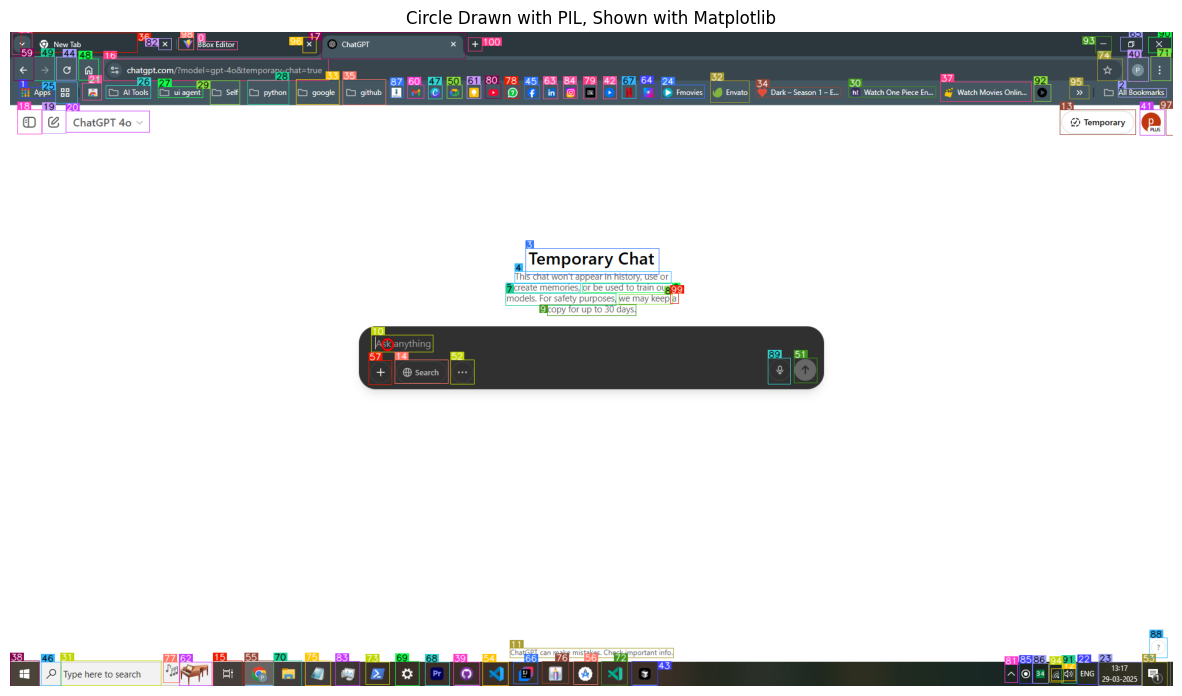

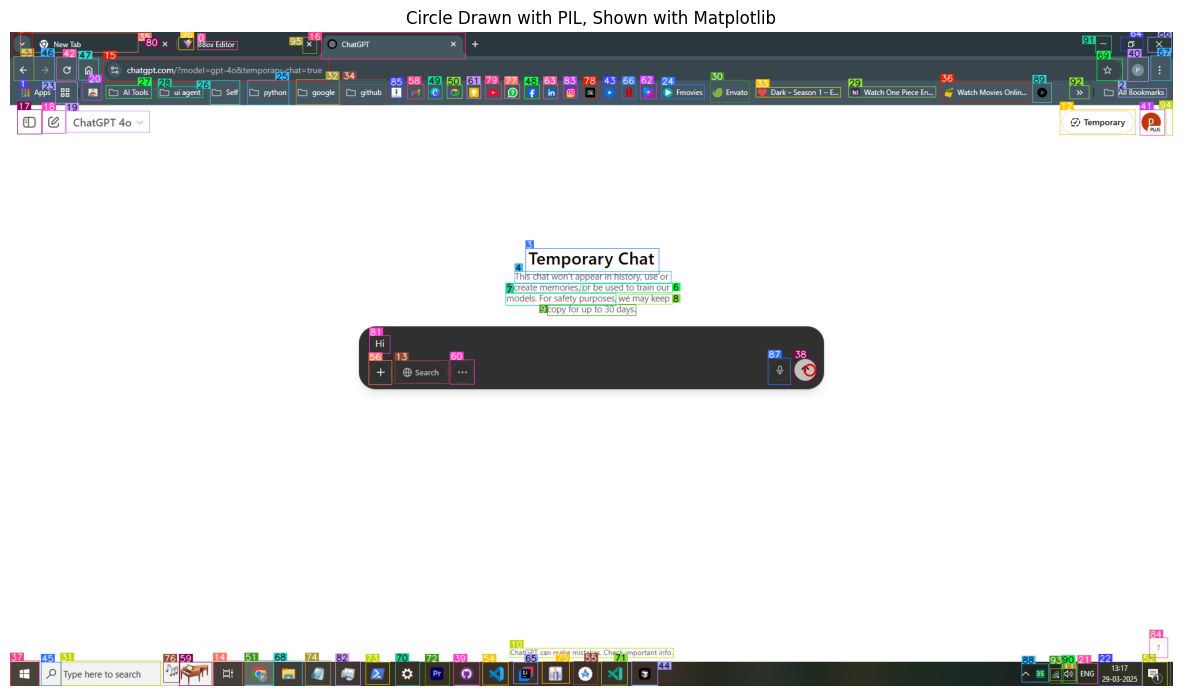

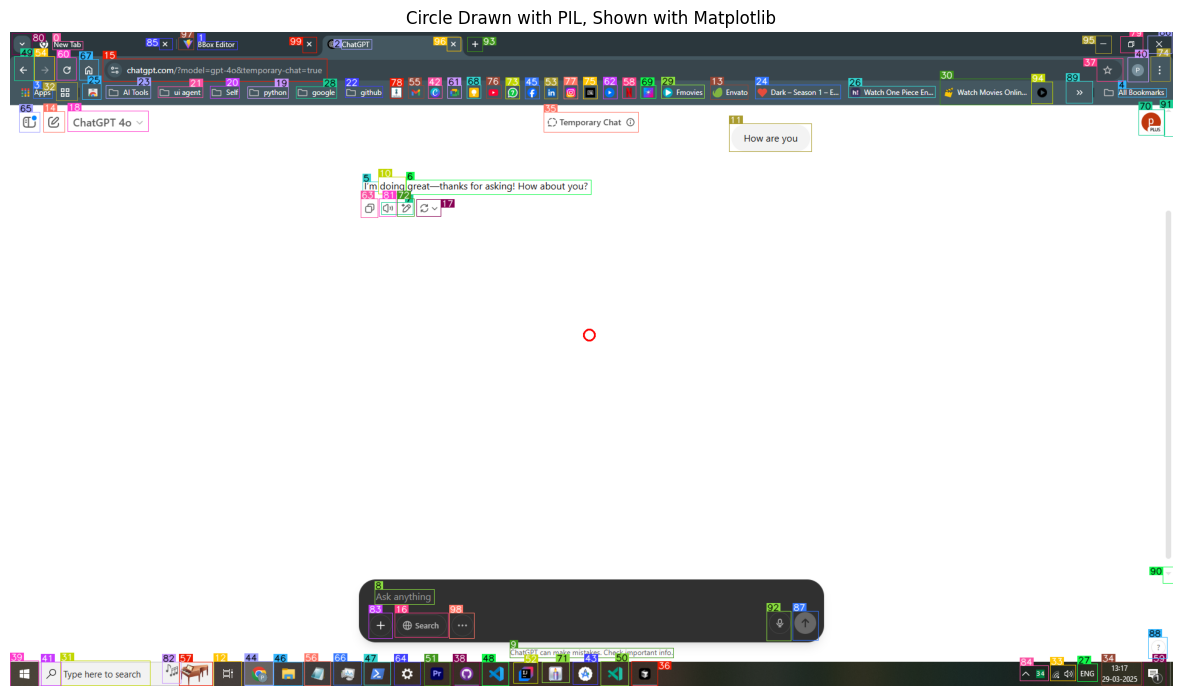

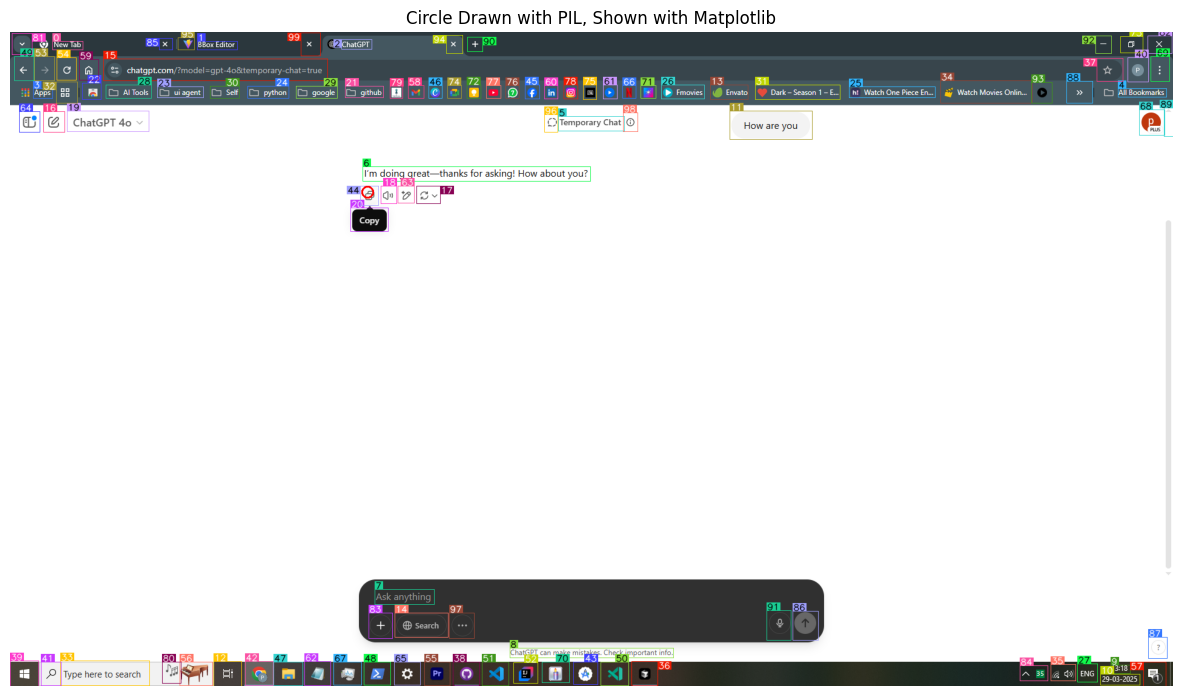

In [6]:
import base64
import matplotlib.pyplot as plt
import io
from PIL import Image, ImageDraw
import numpy as np
def plot_base64_image(base64_image: str, figsize=(15,15)):
    plt.figure(figsize=figsize)

    image = Image.open(io.BytesIO(base64.b64decode(base64_image)))
    plt.axis('off')

    plt.imshow(image)

def plot_dino_labled_img(omniparser_result_model: OmniParserResultModel):
    plot_base64_image(omniparser_result_model.omniparser_result.dino_labled_img)
    
def plot_dino_labled_img_with_click_coords(omniparser_result_model: OmniParserResultModel, screenshot_events: List[ScreenshotEvent]):
    dino_labled_img = omniparser_result_model.omniparser_result.dino_labled_img
    result_event_id = omniparser_result_model.event_id
    # find corresponding screenshot event
    screenshot_event = None
    for event in screenshot_events:
        if event.event_id == result_event_id:
            screenshot_event = event
            break
    if screenshot_event is None:
        print(f"No screenshot event found for result event id: {result_event_id}")
        return
    
    x, y = screenshot_event.mouse_x, screenshot_event.mouse_y
    radius = 10
    if x is None or y is None:
        print(f"No mouse click coords found for result event id: {result_event_id}")
        return
    # open image and draw a circle at the mouse click coords
    image = Image.open(io.BytesIO(base64.b64decode(dino_labled_img)))
    draw = ImageDraw.Draw(image)
    draw.ellipse((x - radius, y - radius, x + radius, y + radius), outline="red", width=3)
    # Step 2: Convert PIL image to NumPy array
    image_np = np.array(image)

    # Step 3: Display using matplotlib
    plt.figure(figsize=(15,15))
    plt.imshow(image_np)
    plt.axis("off")  # Hide axes
    plt.title("Circle Drawn with PIL, Shown with Matplotlib")
    plt.show()

# for omniparser_result_model in omni_inference_data:
#     plot_dino_labled_img(omniparser_result_model)
    
for omniparser_result_model in omni_inference_data:
    plot_dino_labled_img_with_click_coords(omniparser_result_model, screenshot_events)


In [7]:
# lets get parsed_content_result at each mouse click from the screenshot_events
# {event_id: str, parsed_content_result: ParsedContentResult, mouse_click_coords: Tuple[int, int]}
parsed_content_results_with_mouse_click_coords = {}
for screenshot_event in screenshot_events:
    for omniparser_result_model in omni_inference_data:
        if omniparser_result_model.event_id == screenshot_event.event_id:
            _parsed_content_results = omniparser_result_model.parsed_content_results
            x, y = screenshot_event.mouse_x, screenshot_event.mouse_y
            if x is None or y is None:
                print(f"No mouse click coords found for result event id: {omniparser_result_model.event_id}")
                continue
            for item in _parsed_content_results:
                # check if the bbox contains the mouse click coords
                if item.bbox[0] <= x <= item.bbox[2] and item.bbox[1] <= y <= item.bbox[3]:
                    print(f"Item {item.id} contains the mouse click coords {x, y} for event id: {omniparser_result_model.event_id}")
                    print( f"   Item: {item}")
                    parsed_content_results_with_mouse_click_coords[omniparser_result_model.event_id] = {
                        "parsed_content_result": item,
                        "mouse_click_coords": (x, y),
                    }
            break
print(f"Total parsed_content_results with mouse click coords: {len(parsed_content_results_with_mouse_click_coords)}")
# pretty print the parsed_content_results_with_mouse_click_coords
print(parsed_content_results_with_mouse_click_coords)


Item 10 contains the mouse click coords (623, 516) for event id: 9b073de5-e2c1-468f-a1ce-b7d033d4be7b
   Item: ParsedContentResult(type='text', bbox=[596.0, 500.0, 698.0, 528.0], interactivity=False, content='AAsk anything', source='box_ocr_content_ocr', id=10)
Item 38 contains the mouse click coords (1320, 558) for event id: 2065c037-ad71-41ff-b4b7-72ad3cfbc481
   Item: ParsedContentResult(type='icon', bbox=[1294.0, 539.0, 1333.0, 578.0], interactivity=True, content='Up or down.', source='box_yolo_content_yolo', id=38)
Item 44 contains the mouse click coords (590, 264) for event id: 2d269a28-6aac-4484-84e7-18e7cf719987
   Item: ParsedContentResult(type='icon', bbox=[578.0, 254.0, 609.0, 286.0], interactivity=True, content='Copy', source='box_yolo_content_yolo', id=44)
Total parsed_content_results with mouse click coords: 3
{'9b073de5-e2c1-468f-a1ce-b7d033d4be7b': {'parsed_content_result': ParsedContentResult(type='text', bbox=[596.0, 500.0, 698.0, 528.0], interactivity=False, content=

In [8]:
from omni_helper import ParsedContentResult
def find_item_with_id_in_results_dict(id: int, results_dict):
    for event_id, result in results_dict.items():
        if result["parsed_content_result"].id == id:
            return result, event_id
    return None

def check_if_str_contains_substr(input_str, substr):
    return input_str.__contains__(substr)

def update_content_in_item(item: ParsedContentResult, new_content: str, str_contains_substr_enabled=False):
    original_content = item.content
    if str_contains_substr_enabled and check_if_str_contains_substr(original_content, new_content):
        print(f"Skipped updating content as-{original_content} already contains-{new_content}")
        return item
    item.content = new_content
    return item

def find_and_update_content_in_item(id: int, results_dict, content: str):
    item, event_id = find_item_with_id_in_results_dict(id, results_dict)
    
    print(f"Item found: {item}")
    if item is not None:
        print(f"Updating content in item content from-{item['parsed_content_result'].content} to-{content}")
        item = update_content_in_item(item['parsed_content_result'], content)
    return item,event_id

In [9]:
# print(find_item_with_id_in_results_dict(10, parsed_content_results_with_mouse_click_coords))
# use user input to update the content of the item
# list all the ids in the parsed_content_results_with_mouse_click_coords with their content
# print("List of available items with their ids and content:")
# for id, item in parsed_content_results_with_mouse_click_coords.items():
#     print(f"Item {item['parsed_content_result'].id}: {item['parsed_content_result'].content}")
# id = int(input("Enter the id of the item to update: "))
# # item_parsed_content_result = find_item_with_id_in_results_dict(id, parsed_content_results_with_mouse_click_coords)['parsed_content_result']
# # print(f"Item parsed content result: {item_parsed_content_result}")
# content = input("Enter the new content: ")
# if content != "":
#     updated_item = find_and_update_content_in_item(id, parsed_content_results_with_mouse_click_coords, content)
#     print(f"Updated item: {updated_item[0]}")
#     print(f"event id: {updated_item[1]}")
# else:
#     print("Skipping update because content is empty")

In [10]:
from typing import Tuple, Dict, Any
from util.utils import annotate, box_convert
from omni_helper import  extract_bbox_patch, save_pil_image_to_file, ParsedContentResult

# Function to convert the dictionary to a tuple
def parsed_results_dict_to_tuple(data: Dict[str, Dict[str, Any]]) -> Tuple[Tuple[str, Tuple[ParsedContentResult, Tuple[int, int]]], ...]:
    return tuple(
        (key, (value['parsed_content_result'], value['mouse_click_coords']))
        for key, value in data.items()
    )
    
event_with_clicked_items = parsed_results_dict_to_tuple(parsed_content_results_with_mouse_click_coords)
for item in event_with_clicked_items:
    print(item)


('9b073de5-e2c1-468f-a1ce-b7d033d4be7b', (ParsedContentResult(type='text', bbox=[596.0, 500.0, 698.0, 528.0], interactivity=False, content='AAsk anything', source='box_ocr_content_ocr', id=10), (623, 516)))
('2065c037-ad71-41ff-b4b7-72ad3cfbc481', (ParsedContentResult(type='icon', bbox=[1294.0, 539.0, 1333.0, 578.0], interactivity=True, content='Up or down.', source='box_yolo_content_yolo', id=38), (1320, 558)))
('2d269a28-6aac-4484-84e7-18e7cf719987', (ParsedContentResult(type='icon', bbox=[578.0, 254.0, 609.0, 286.0], interactivity=True, content='Copy', source='box_yolo_content_yolo', id=44), (590, 264)))


In [11]:
#  find omni result models for each event id event_with_clicked_items tuple
# format - {event_id: [parsed_result, result_model]}
event_data_with_clicked_item_and_result_model = {}
for event_with_clicked_item in event_with_clicked_items:
    event_id = event_with_clicked_item[0]
    _parsed_content_result = event_with_clicked_item[1]
    for result_model in omni_inference_data:
        if(event_id == result_model.event_id):
            event_data_with_clicked_item_and_result_model[event_id] = (_parsed_content_result, result_model)
            
event_data_with_clicked_item_and_result_model

{'9b073de5-e2c1-468f-a1ce-b7d033d4be7b': ((ParsedContentResult(type='text', bbox=[596.0, 500.0, 698.0, 528.0], interactivity=False, content='AAsk anything', source='box_ocr_content_ocr', id=10),
   (623, 516)),
  OmniParserResultModel(event_id='9b073de5-e2c1-468f-a1ce-b7d033d4be7b', project_uuid='chatgpt', command_uuid='883c46f5-c62d-4799-baa1-5e3b12f12e8c', timestamp=datetime.datetime(2025, 3, 29, 13, 17, 25, 761291), description='Mouse clicked at (623, 516) with Button.left', omniparser_result=OmniparserResult(dino_labled_img='iVBORw0KGgoAAAANSUhEUgAAB4AAAAQ4CAIAAABnsVYUAAEAAElEQVR4nOzdd3wT9f8H8NddLpc0TdO9By2UAmWXJVs2CMgQ2YiACg78oogo7i3iQFDEgTgQWTIEZG9kr0KBFgot3XukSZpcLnffP65N050OWsDP8+Hv+2s+97nPfZJeQ/K+970/VOtuvWGfKNmwkgfuajzfH44sfjiCW5lluw5sifFdoTNh1XFcTbbd0sayy87DEcT9JapPKwAIbwufABzdB54HAIZBn0FIS8a1y6Bp9BoAvRbnTxftI23NzMCV81JDm6PXG2XyxP1r6mmvxp4CQdwT1nTLaOwpEARBEARBEARB1N6C544CMBq127Z90LXreJqSRV3dFx7er0mTCJpmpD5XLu8+eXJtamq0IAoymm7XfsQjj7zCsirrIEtW9Kmv+aQedwYvFC6Pl4Wo2NE+1nbTD3fMe

09:12:53 WARNING:Skipping saving PIL image to file for source: 10


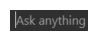

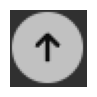

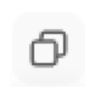

In [12]:
out_dir = os.getcwd()
for key, value in event_data_with_clicked_item_and_result_model.items():
    _parse_content_result = value[0][0]
    _result_model = value[1]
    patch64, pil_image = extract_bbox_patch(_parse_content_result, _result_model)
    
    plot_base64_image(patch64, figsize=(1,1))
    save_pil_image_to_file(_parse_content_result, pil_image=pil_image, output_dir=out_dir)
    
    
    

In [15]:
# list all parsed_content_results source types
for i, result in enumerate(omni_inference_data):
    sources = set() 
    for item in result.parsed_content_results:
        sources.add(item.source)
    print(f"Result {i} has sources: {sources}")


Result 0 has sources: {'box_ocr_content_ocr', 'box_yolo_content_yolo', 'box_yolo_content_ocr'}
Result 1 has sources: {'box_ocr_content_ocr', 'box_yolo_content_yolo', 'box_yolo_content_ocr'}
Result 2 has sources: {'box_ocr_content_ocr', 'box_yolo_content_yolo', 'box_yolo_content_ocr'}
Result 3 has sources: {'box_ocr_content_ocr', 'box_yolo_content_yolo', 'box_yolo_content_ocr'}


In [24]:
current_dir = os.getcwd()
dark_theme_image_path = os.path.join(current_dir, "chatgpt_dark_theme_test.png")
light_theme_image_path = os.path.join(current_dir, "chatgpt_light_theme_test.png")
from omni_helper import get_omniparser_inference_data_from_image_path
dark_result_model = get_omniparser_inference_data_from_image_path(dark_theme_image_path)
light_result_model = get_omniparser_inference_data_from_image_path(light_theme_image_path)


c:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\venv\lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Omniparser initialized!!!
image size: (826, 774)

0: 1216x1280 16 icons, 121.7ms
Speed: 15.6ms preprocess, 121.7ms inference, 0.0ms postprocess per image at shape (1, 3, 1216, 1280)


c:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\venv\lib\site-packages\transformers\generation\configuration_utils.py:649: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
09:25:50 INFO:Getting omniparser result model for event_id: -1


len(filtered_boxes): 38 29
time to get parsed content: 0.13264036178588867


09:25:50 INFO:Converting parsed content df to bounding boxes for event_id: -1
09:25:50 INFO:Pre-processed parsed content results for event_id: -1
09:25:50 INFO:Creating omniparser result model for event_id: -1
09:25:50 INFO:Created omniparser result model for event_id: -1
c:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\venv\lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Omniparser initialized!!!
image size: (816, 798)

0: 1280x1280 18 icons, 121.0ms
Speed: 15.6ms preprocess, 121.0ms inference, 0.0ms postprocess per image at shape (1, 3, 1280, 1280)


c:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\venv\lib\site-packages\transformers\generation\configuration_utils.py:649: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
09:25:59 INFO:Getting omniparser result model for event_id: -1
09:25:59 INFO:Converting parsed content df to bounding boxes for event_id: -1
09:25:59 INFO:Pre-processed parsed content results for event_id: -1


len(filtered_boxes): 39 29
time to get parsed content: 0.13165020942687988


09:25:59 INFO:Creating omniparser result model for event_id: -1
09:25:59 INFO:Created omniparser result model for event_id: -1


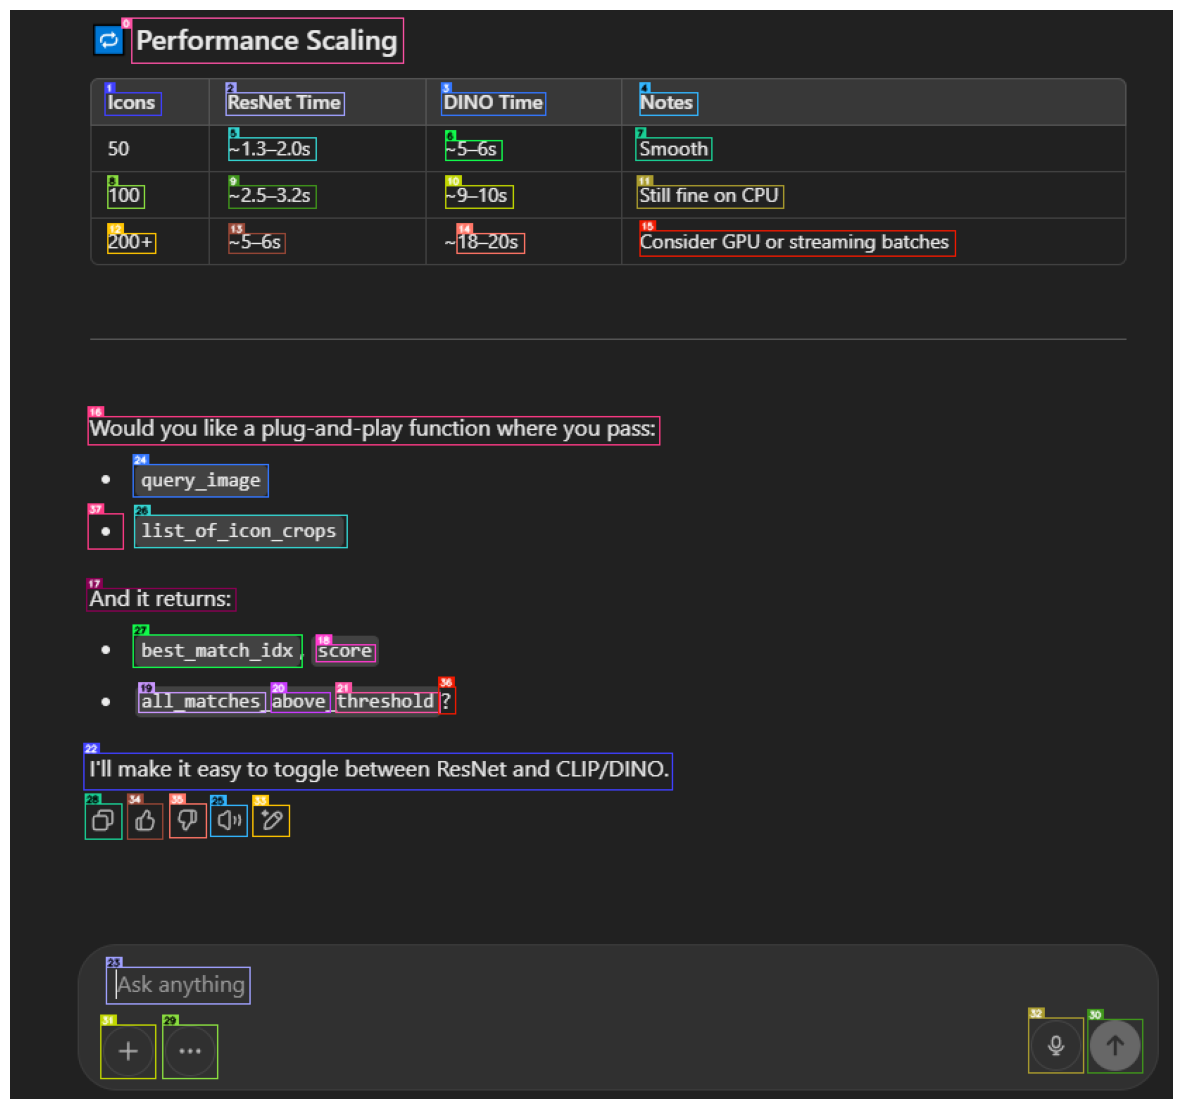

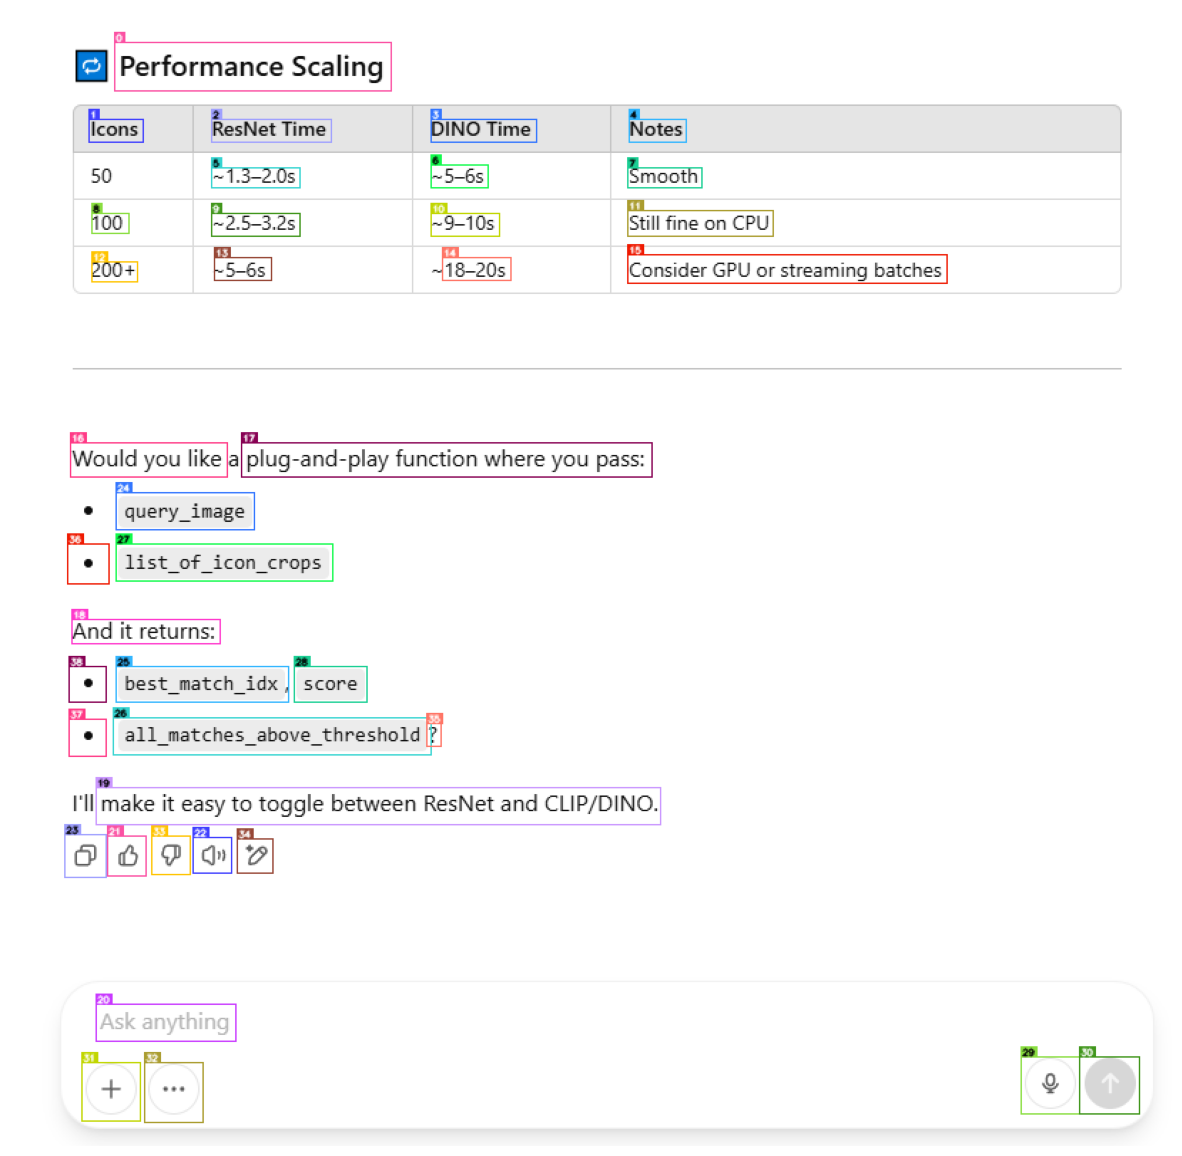

In [25]:
plot_dino_labled_img(dark_result_model)
plot_dino_labled_img(light_result_model)


In [28]:
# search id from parsed_content_results
def search_id_from_parsed_content_results(id: int, 
                                        result: OmniParserResultModel,
                                        interactive: bool = True):
    for i, item in enumerate(result.parsed_content_results):
        # print(f"Checking item {i}: id={item.id}, interactivity={item.interactivity}")
        # print(type(item.id))
        if item.id == id and item.interactivity == interactive:
            print(f"Found matching item: {item}")
            return item
    print("No matching item found")
    return None

result = search_id_from_parsed_content_results(30, light_result_model, interactive=True)
print("Returned value:")
for key, value in result.to_dict().items():
            print(f"  {key}: {value}")

Found matching item: ParsedContentResult(type='icon', bbox=[751.0, 735.0, 792.0, 776.0], interactivity=True, content='Up', source='box_yolo_content_yolo', id=30)
Returned value:
  type: icon
  bbox: [751.0, 735.0, 792.0, 776.0]
  interactivity: True
  content: Up
  source: box_yolo_content_yolo
  id: 30
